In [1]:
# Chess Board Training

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import os
from ultralytics import YOLO


0: 544x800 1 0, 45.0ms
Speed: 3.0ms preprocess, 45.0ms inference, 59.0ms postprocess per image at shape (1, 3, 544, 800)


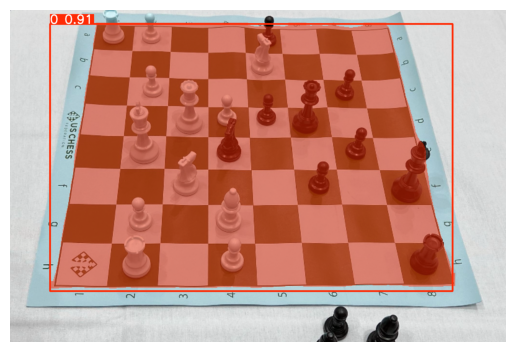

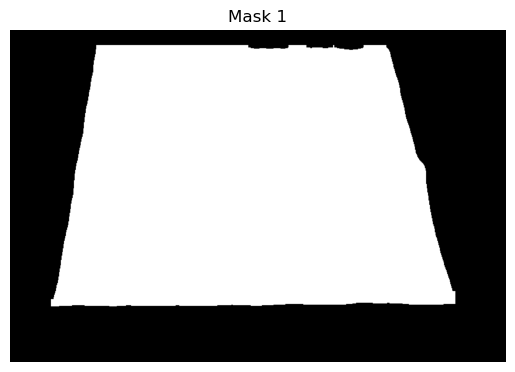

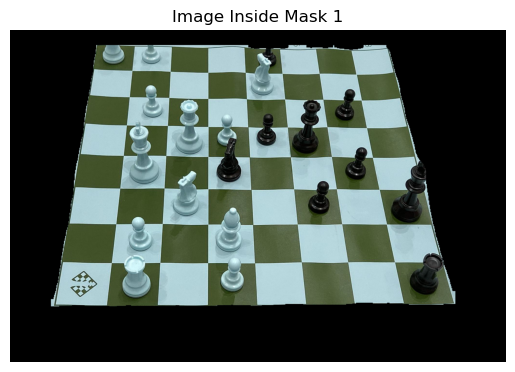

In [3]:
# Load the YOLO model
model_path = os.path.join('.', 'runs', 'segment', 'train', 'weights', 'best.pt')
model = YOLO(model_path)

# Load the image
image_path = "C:/Users/Daithoulung Rongmai/KRS(ML)/ProjectRe/Chess-Pieces-23/train/images/3474d785b1b21d68163f56aa00a92bc9_jpg.rf.6bd40b33320a982005920d6d2d680c64.jpg"
img = Image.open(image_path)

# Run inference
results = model.predict(img, conf=0.8)

# Display results
for result in results:
    img_np = result.plot() if hasattr(result, 'plot') else result  
    plt.imshow(img_np)
    plt.axis('off')
    plt.show()

    if hasattr(result, 'masks'):
        # Extract the mask data
        masks = result.masks.data.cpu().numpy()  # Get the masks and convert to NumPy array
        
        # Iterate over masks
        for i in range(masks.shape[0]):
            mask = masks[i]

            # Convert mask to binary (0, 255) for visualization
            mask_binary = (mask * 255).astype(np.uint8)

            # Resize mask to match the original image size
            mask_binary_resized = cv2.resize(mask_binary, (img_np.shape[1], img_np.shape[0]), interpolation=cv2.INTER_NEAREST)

            # Optionally, visualize the mask
            plt.imshow(mask_binary_resized, cmap='gray')
            plt.title(f'Mask {i + 1}')
            plt.axis('off')
            plt.show()

            # Extract the image inside the mask
            img_np = np.array(img)  # Convert PIL image to NumPy array
            masked_image = cv2.bitwise_and(img_np, img_np, mask=mask_binary_resized)

            # Display the masked image
            plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
            plt.title(f'Image Inside Mask {i + 1}')
            plt.axis('off')
            plt.show()
    else:
        print("No masks found in the results.")



0: 544x800 1 0, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 800)


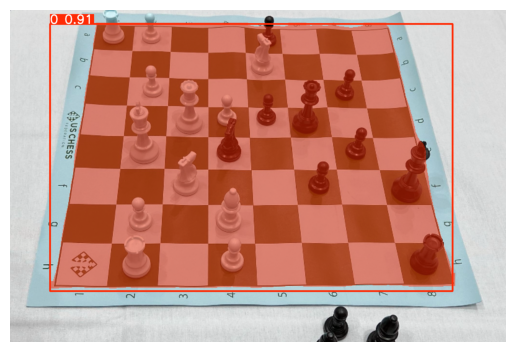

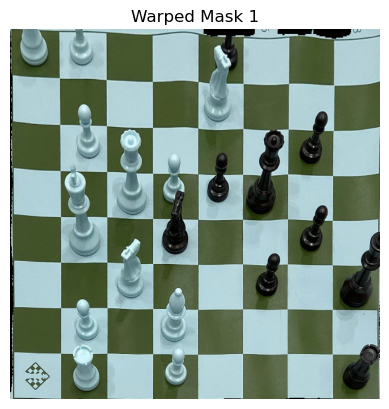

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from ultralytics import YOLO

# Load the YOLO model
model_path = os.path.join('.', 'runs', 'segment', 'train', 'weights', 'best.pt')
model = YOLO(model_path)

# Load the image
image_path = "C:/Users/Daithoulung Rongmai/KRS(ML)/ProjectRe/Chess-Pieces-23/train/images/3474d785b1b21d68163f56aa00a92bc9_jpg.rf.6bd40b33320a982005920d6d2d680c64.jpg"
img = Image.open(image_path)

# Run inference
results = model.predict(img, conf=0.8)

# Display results
for result in results:
    img_np = result.plot() if hasattr(result, 'plot') else result  
    plt.imshow(img_np)
    plt.axis('off')
    plt.show()

    if hasattr(result, 'masks'):
        # Extract the mask data
        masks = result.masks.data.cpu().numpy()  # Get the masks and convert to NumPy array
        
        # Iterate over masks
        for i in range(masks.shape[0]):
            mask = masks[i]

            # Convert mask to binary (0, 255) for visualization
            mask_binary = (mask * 255).astype(np.uint8)

            # Resize mask to match the original image size
            mask_binary_resized = cv2.resize(mask_binary, (img_np.shape[1], img_np.shape[0]), interpolation=cv2.INTER_NEAREST)

            # Extract the image inside the mask
            img_np = np.array(img)  # Convert PIL image to NumPy array
            masked_image = cv2.bitwise_and(img_np, img_np, mask=mask_binary_resized)

            # Find contours of the mask
            contours, _ = cv2.findContours(mask_binary_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Get the largest contour, assuming it corresponds to the object of interest
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)

                # Approximate the contour to get the corners
                epsilon = 0.02 * cv2.arcLength(largest_contour, True)
                approx_corners = cv2.approxPolyDP(largest_contour, epsilon, True)

                if len(approx_corners) == 4:  # We need 4 corners for perspective transformation
                    src_pts = np.array([pt[0] for pt in approx_corners], dtype="float32")

                    # Define destination points for the top-down view (e.g., 600x600)
                    dst_pts = np.array([[0, 0], [600, 0], [600, 600], [0, 600]], dtype="float32")

                    # Compute the perspective transform matrix
                    M = cv2.getPerspectiveTransform(src_pts, dst_pts)

                    # Apply the warp perspective transformation
                    warped_mask = cv2.warpPerspective(masked_image, M, (600, 600))
                    
                    rotated_mask= cv2.rotate(warped_mask, cv2.ROTATE_90_CLOCKWISE)

                    mirrored_mask = cv2.flip(rotated_mask, 1)

                    plt.imshow(cv2.cvtColor(mirrored_mask, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
                    plt.title(f'Warped Mask {i + 1}')
                    plt.axis('off')
                    plt.show()
                else:
                    print("Could not find 4 corners for perspective transformation.")
            else:
                print("No contours found for the mask.")
    else:
        print("No masks found in the results.")



0: 800x800 1 black-king, 1 black-knight, 3 black-pawns, 1 black-queen, 1 black-rook, 1 white-bishop, 1 white-king, 2 white-knights, 4 white-pawns, 1 white-queen, 2 white-rooks, 10.0ms
Speed: 3.9ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)


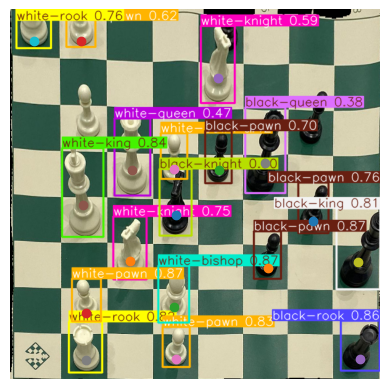

In [5]:
model_path = os.path.join('.', 'runs', 'detect', 'train_CP', 'weights', 'last.pt')
model = YOLO(model_path)

results = model.predict(mirrored_mask, conf=0.3)

custom = 20
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        center_x = (x_min + x_max) / 2
        center_y = ((y_min + y_max) / 2) + custom
        plt.scatter(center_x, center_y)
img_np = result.plot()
plt.imshow(img_np)
plt.axis('off')
plt.show()


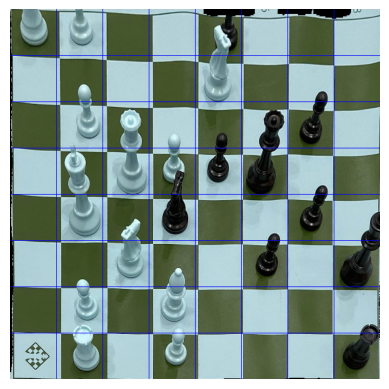

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'img_np' is the rotated warped image matrix (loaded or generated previously).

# Define the size of the grid
grid_size = 600  # We'll map the warped image to a 600x600 square

rows = 8
cols = 8

# Calculate the width and height of each cell in the grid
cell_width = grid_size // cols
cell_height = grid_size // rows

# Copy the warped image to draw the grid
img_with_grid = mirrored_mask.copy()

# Draw horizontal lines for the grid
for i in range(1, rows):
    y = i * cell_height
    cv2.line(img_with_grid, (0, y), (grid_size, y), (255, 0, 0), 1)  # Horizontal line

# Draw vertical lines for the grid
for i in range(1, cols):
    x = i * cell_width
    cv2.line(img_with_grid, (x, 0), (x, grid_size), (255, 0, 0), 1)  # Vertical line

# Display the warped image with the grid
plt.imshow(cv2.cvtColor(img_with_grid, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in Matplotlib
plt.axis('off')  # Remove axis for a clean display
plt.show()


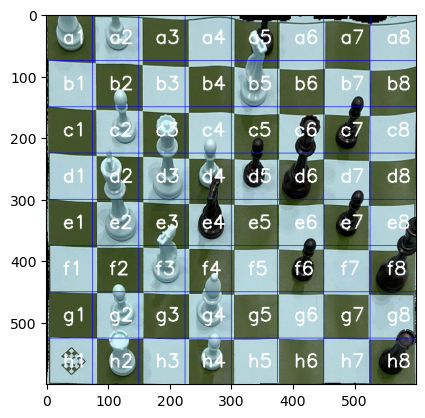

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assume previous code created warped_image and grid dimensions
rows, cols = 8, 8
grid_size = 600
cell_width = grid_size // cols
cell_height = grid_size // rows

# Chessboard column labels ('a' to 'h') and row labels ('1' to '8')
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
rows_labels = ['1', '2', '3', '4', '5', '6', '7', '8']

# Reverse the row labels to make sure bottom-left is 'a1'
# rows_labels.reverse()

# Copy the warped image to draw labels
img_with_labels = img_with_grid.copy()

# Iterate over each cell in the grid
for i in range(rows):
    for j in range(cols):
        # Calculate the top-left corner of the current cell
        x = j * cell_width
        y = i * cell_height

        # Generate the corresponding chessboard label
        label = columns[i] + rows_labels[j]

        # Place the label at the center of the cell
        text_x = x + cell_width // 2 - 10  # Adjust for text alignment
        text_y = y + cell_height // 2 + 10  # Adjust for text alignment

        # Add the label to the image (white text with font size 1)
        cv2.putText(img_with_labels, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Display the warped image with grid and labels
plt.imshow(cv2.cvtColor(img_with_labels, cv2.COLOR_BGR2RGB))
plt.show()


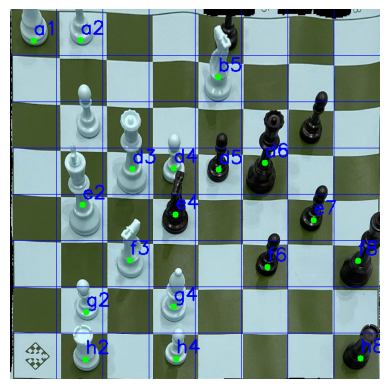

In [8]:
res = img_with_grid.copy()
boxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding box coordinates (x_min, y_min, x_max, y_max)

piece_positions = {}

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    classes = result.boxes.cls.cpu().numpy()  # Get the class indices
    names = result.names  # Get the class names

    for box, class_id in zip(boxes, classes):
        x_min, y_min, x_max, y_max = box
        center_x = (x_min + x_max) / 2
        center_y = ((y_min + y_max) / 2) + custom

        # Calculate the grid position
        grid_col = int(center_x // cell_width)
        grid_row = int(center_y // cell_height)

        if 0 <= grid_col < cols and 0 <= grid_row < rows:
            # Get the corresponding grid label
            grid_label = columns[grid_row] + rows_labels[grid_col]

            # Store the piece position and type in the dictionary
            piece_positions[grid_label] = names[int(class_id)]  # Correctly map label to class name
            
            cv2.circle(res, (int(center_x), int(center_y)), 5, (0, 255, 0), -1)
            cv2.putText(res, grid_label, (int(center_x), int(center_y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        else:
            print(f"Center point ({center_x}, {center_y}) is outside the grid bounds.")

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


A white-rook is located in a1.
A white-pawn is located in a2.


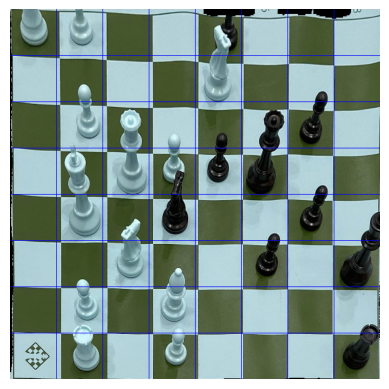

In [9]:
def check_piece_in_cell(cell_label):
    if cell_label in piece_positions:
        return f"A {piece_positions[cell_label]} is located in {cell_label}."
    else:
        return f"No piece found in {cell_label}."

print(check_piece_in_cell('a1'))  # Check for piece in a1
print(check_piece_in_cell('a2'))  # Check for piece in b2

# Display the final image with the grid and labels
plt.imshow(cv2.cvtColor(img_with_grid, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()